In [2]:
import pandas as pd
df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [16]:
cond = df['Species'].isin(['Bream', 'Smelt'])
fish_data = df.loc[cond, ['Length2', 'Weight']]
fish_data

,Length2,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0
5,29.7,450.0
6,29.7,500.0
7,30.0,390.0
8,30.0,450.0
9,30.7,500.0


In [17]:
fish_data.head()

,Length2,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [18]:
# 0/1 대신 이름 자체를 활용해 전처리하기
fish_target = df.loc[cond, ['Species']]

# 섞고 쪼개는 과정을 메소드 활용해 압축하기
# train_test_split(): 입력받은 리스트/배열을 훈련/데이터 세트로 알아서 나눠줌

In [19]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target)
# 인덱스 무작위로 섞고 >> 비율대로 train/test 구분해줌 >> 리스트로 나온 것 4등분해야 함
# 각각 리스트로 묶인 것을 순서대로 객체에 할당하겠단 것임
# 3:1로 나뉘게 됨
len(train_input)
len(test_input)

13

In [29]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

kn.fit(train_input, train_target['Species'])
kn.score(test_input, test_target['Species']) 

1.0

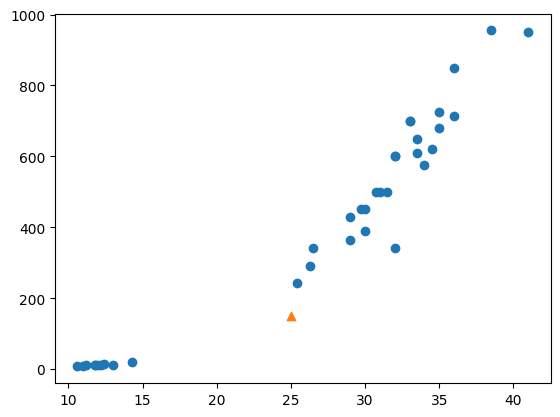

In [34]:
import matplotlib.pyplot as plt

plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25, 150, marker = '^') # 마커 옵션: 산점도의 점 모양 변경

In [37]:
kn.kneighbors([[25, 150]])

C:\Users\1-08\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[ 92.00086956, 130.73859415, 137.17988191, 138.32150953,
         138.39320793]]),
 array([[ 2, 21, 24,  8, 25]]))

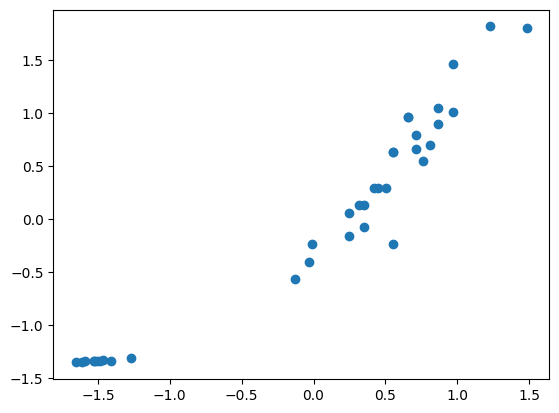

In [45]:
#표준점수 만들기: -평균 / 표준편차(std)

# 평균, 표준편차 구하기
mean = train_input.mean()
std = train_input.std()

train_scaled = (train_input - mean) / std # 각 값에서 평균 빼고, std로 나눈 값이 나옴 >> 그럼 표준점수로 변환되는 것
    # 스케일이 일정히 바뀐 데이터인 것

plt.scatter(train_scaled['Length2'], train_scaled['Weight'])
# x, y축 변경돼 표시됨 >> 그럼 다른 자료와 비교 더 명확히 할 수 있음 

In [47]:
kn.fit(train_scaled, train_target['Species']) # 표준점수로 학습시키기

test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target['Species']) # 평가하는 데이터도 표준점수화 시켜야 함

1.0

In [49]:
new = ([25, 150] - mean) / std
new
kn.predict([new])

C:\Users\1-08\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)